In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import ast

In [2]:
tracks = pd.read_csv('tracks1_label.csv')
features = pd.read_csv('features1.csv')
genres = pd.read_csv('genres.csv')

In [3]:
df = pd.merge(tracks, features, on='track_id', how='inner')

In [4]:
df = df.dropna(axis = 0, how = 'any')

In [5]:
len(tracks),len(features),len(df)

(106573, 34395, 34393)

In [6]:
df.head()

,track_id,track_title,artis_name,track_genres,chroma_cens_kurtosis,chroma_cens.1_kurtosis,chroma_cens.2_kurtosis,chroma_cens.3_kurtosis,chroma_cens.4_kurtosis,chroma_cens.5_kurtosis,...,tonnetz.39_std,tonnetz.40_std,tonnetz.41_std,zcr_kurtosis,zcr.1_max,zcr.2_mean,zcr.3_median,zcr.4_min,zcr.5_skew,zcr.6_std
0,2,Food,AWOL,[21],7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,Electric Ave,AWOL,[21],1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,This World,AWOL,[21],0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,Freeway,Kurt Vile,[10],3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,Spiritual Level,Nicky Cook,"[76, 103]",-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [7]:
track_genres = [ast.literal_eval(l) for l in list(df.track_genres)]

In [8]:
track_genres = [[genres[genres.genre_id==k].title.item() for k in el ] for el in track_genres ]

In [9]:
d={}
for l in track_genres:
    for genre in l:
        if genre in d:
            d[genre]+=1
        else:
            d[genre]=1

In [10]:
min_occurrence = 2000
d = {k: v for k, v in d.items() if v > min_occurrence}

In [11]:
d

{'Avant-Garde': 3005,
 'Electronic': 6910,
 'Experimental': 6744,
 'Experimental Pop': 2991,
 'Folk': 2369,
 'Lo-Fi': 2674,
 'Noise': 2389,
 'Pop': 2155,
 'Rock': 3188}

In [12]:
keys,values = [],[]
for k,v in d.items():
    keys.append(k)
    values.append(v)
keys,values = np.array(keys),np.array(values)

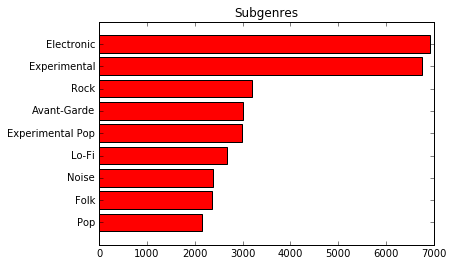

In [13]:
indices = np.argsort(values)

plt.figure()
plt.title("Subgenres")
plt.barh(range(0,len(indices)), values[indices],
       color="r", align="center")
plt.yticks(range(0,len(indices)), keys[indices])
plt.ylim([-1, len(indices)])
plt.show()

In [17]:
track_genres1 =[]
for l in track_genres:
    l1=[]
    for genre in l:
        if genre in d:
            l1.append(genre)
    track_genres1.append(l1)

In [22]:
track_genres1 = [str(s) for s in track_genres1]

In [23]:
df.track_genres = track_genres1
df = df[df.track_genres!='[]']

In [24]:
df.head(10)

,track_id,track_title,artis_name,track_genres,chroma_cens_kurtosis,chroma_cens.1_kurtosis,chroma_cens.2_kurtosis,chroma_cens.3_kurtosis,chroma_cens.4_kurtosis,chroma_cens.5_kurtosis,...,tonnetz.39_std,tonnetz.40_std,tonnetz.41_std,zcr_kurtosis,zcr.1_max,zcr.2_mean,zcr.3_median,zcr.4_min,zcr.5_skew,zcr.6_std
3,10,Freeway,Kurt Vile,['Pop'],3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,Spiritual Level,Nicky Cook,['Experimental Pop'],-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
5,26,Where is your Love?,Nicky Cook,['Experimental Pop'],-0.699535,-0.684158,0.048825,0.042659,-0.818967,-0.917123,...,0.103717,0.025541,0.023846,41.645809,0.250488,0.018388,0.015625,0.000000,4.690596,0.014598
6,30,Too Happy,Nicky Cook,['Experimental Pop'],-0.721487,-0.848560,0.890904,0.088620,-0.445513,-1.271170,...,0.141693,0.020426,0.025418,8.166595,0.546875,0.054417,0.036133,0.002441,2.244708,0.052674
7,46,Yosemite,Nicky Cook,['Experimental Pop'],-0.119708,-0.858814,2.362546,0.106584,-1.315912,-1.220354,...,0.132632,0.033212,0.021310,14.731083,0.223633,0.036601,0.032227,0.000000,2.848736,0.020713
8,48,Light of Light,Nicky Cook,['Experimental Pop'],-1.054053,0.932339,0.528064,-1.035338,-1.000682,-1.119304,...,0.141955,0.024654,0.025203,24.550789,0.371582,0.033015,0.022461,0.000000,4.406733,0.039016
12,137,Side A,Airway,"['Avant-Garde', 'Noise']",1.607191,1.199649,0.745765,1.430835,-0.155455,0.768487,...,0.041466,0.011149,0.011149,40.950294,0.619629,0.088439,0.086914,0.000000,3.275552,0.021831
13,138,Side B,Airway,"['Avant-Garde', 'Noise']",1.501403,0.957514,1.276685,0.640389,0.442936,0.845533,...,0.045315,0.012823,0.012725,5.126394,0.627441,0.102232,0.099121,0.004883,0.633483,0.034676
14,139,CandyAss,Alec K. Redfearn & the Eyesores,['Folk'],-0.020869,0.432330,0.331278,0.829845,2.625593,2.005660,...,0.090518,0.017428,0.021490,1.157352,0.261230,0.070760,0.066895,0.000977,0.769163,0.030017
15,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,['Folk'],0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,...,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712


In [25]:
df.to_csv('df_labels.csv',index=False)